# Simulation of PGA Tour Golf Data

## Programming for Data Analysis Project 

### Andrew Walker - G00398788@gmit.ie

![www.pgatour.com](https://pga-tour-res.cloudinary.com/image/upload/c_fill,dpr_2.6,f_auto,g_center,h_336,q_auto,w_1320/v1/pgatour/editorial/2020/12/17/Logo/flag-example-1400.jpg)

<br>

This project will simulate a data set based on historical PGA Tour golf statistics and model the relationships between four variables:

- Driving distance average (the average number of yards per hole)
- Driving accurary percentage (the percentage of time a tee shot comes to rest in the fairway)
- Greens in Regulation (GIR) percentage (the percent of time a player was able to hit the green in regulation. The GIR stroke is determined by subtracting 2 from par)
- Birdie average (the average number of birdies made per round played.)

The R&A and USGA Distance Insights Report (2020) (https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf) finds that the average driving distance on the PGA Tour has shown a general increase, in particular from the early 1990s with the introduction of oversized drivers. Following this, further technological and rule innovations has led to a trend in increased distance off the tee.  

However, the Distance Insights Report (2020) also finds that as driving distance increases, driving accuracy decreases.

This project will make a comparison of the above four variables to:

1. Model how driving distance affects accuracy
2. Model how distance and accuracy affect the number of greens in regulation hit
3. Model how distance and accuracy affect the number of birdies scored
4. Model how the number of greens in regulation hit affects birdies

Several initial hypothesis can be made:
    
1. As driving distance increases, the accuracy of the shot decreases leading to more tee shots not landing on the fairway.
2. Hitting GIR will lead to more birdies.

The project will model whether the hypothesis are correct.

The project also will model whether driving distance or accuracy is a more useful indicator to hit GIR and to score birdies - whilst a long drive might be less accurate and find the rough, a shorter approach shot might lead to more GIR  and / or more birdies. Conversely, a more accurate tee shot which finds the fairway but has a longer approach shot might lead to more GIR and / or more birdies.

This might be a useful simulation for golfers to establish if distance is more important than accuracy, or vice versa.


The project uses historical data to determine the distribution of random data for modelling. Then, based on the trends in historical data between the years 1990, 2000, 2010, and 2020, predictions are made for likely figures for the four variables in 2030. Random data is then simulated for each variable, using the likely distributions. These variables are then compared to determine whether the hypothesis were correct, and whether driving distance or accuracy is a more useful indicator to hit GIR and to score birdies.

https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

https://www.usga.org/content/dam/usga/pdf/RSI/distance-insights-2021-docs/2020%20Distance%20Report%2026-01-2021.pdf

https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf

https://www.pgatour.com/stats/stat.101.y2021.html

1990 (no major innovations between 1980 and 1990), 2000, 2010, 2020 - simulate data for 2030

Make a note of total number of players on Fedex

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# FOr downloading
import urllib.request as urlrq

#numpy
import numpy as np

# pyplot
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

import math

#insall fitter 
#https://pypi.org/project/fitter/

from scipy import stats
#https://stackoverflow.com/questions/16330831/most-efficient-way-to-find-mode-in-numpy-array
    
import scipy

rng = np.random.default_rng()

from fitter import get_common_distributions
get_common_distributions()
from fitter import Fitter

import statistics




### Compile stats fop top 100 Fedex Cup rankings

https://www.pgatour.com/content/pgatour/stats/stat.02671.y2021.html

The project first uses PGA Tour data(https://www.pgatour.com/) from the top 100 ranked golfers at the end of the 2021 Fedex Cup. 

In [2]:
df = pd.read_csv('data\strokes_gained.csv')
print(df.to_string()) 

    Fedex Rank 2021               Name  Driving distance (avg yds)  Driving accuracy (%)  Greens in Regulation (%)  Birdie average
0                 1    Patrick Cantlay                       302.8                 60.71                     70.16            4.29
1                 2           Jon Rahm                       309.0                 63.73                     71.93            4.51
2                 3           Kevin Na                       288.5                 66.56                     64.11            4.00
3                 4      Justin Thomas                       303.9                 55.72                     67.79            4.31
4                 5     Viktor Hovland                       302.2                 63.86                     68.61            4.40
5                 5  Xander Schauffele                       307.6                 58.83                     68.64            4.28
6                 7  Bryson DeChambeau                       323.7                 

In [3]:
#arrange as data frame
df_arr = df
df_arr.columns = ['Fedex Rank 2021', 'Name', 'Driving distance (avg yds)','Driving accuracy (%)','Greens In Regulation (%)', 'Birdie average']
#https://note.nkmk.me/en/python-pandas-t-transpose/
df_arr

,Fedex Rank 2021,Name,Driving distance (avg yds),Driving accuracy (%),Greens In Regulation (%),Birdie average
0,1,Patrick Cantlay,302.8,60.71,70.16,4.29
1,2,Jon Rahm,309.0,63.73,71.93,4.51
2,3,Kevin Na,288.5,66.56,64.11,4.00
3,4,Justin Thomas,303.9,55.72,67.79,4.31
4,5,Viktor Hovland,302.2,63.86,68.61,4.40
...,...,...,...,...,...,...
95,96,Roger Sloan,295.8,61.78,68.77,3.79
96,97,Brandt Snedeker,286.6,64.04,64.48,3.73
97,98,Hank Lebioda,295.0,61.16,69.14,3.78
98,99,Tyler McCumber,309.4,58.30,64.71,3.57


In [4]:
# select specific column data
distance = df_arr.iloc[:,2]
accuracy = df_arr.iloc[:,3]
gir = df_arr.iloc[:,4]
birdies = df_arr.iloc[:,5]

In [5]:
fitdistance = np.array([distance])


,sumsquare_error,aic,bic,kl_div
lognorm,0.030668,880.478875,-795.155890,inf
gamma,0.030719,880.085594,-794.989700,inf
chi2,0.030719,880.086111,-794.989433,inf
rayleigh,0.031205,inf,-798.023366,inf
norm,0.031863,876.688442,-795.936826,inf


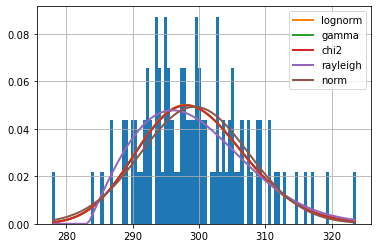

In [6]:
#https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
#https://pypi.org/project/fitter/
#https://fitter.readthedocs.io/en/latest/faqs.html#what-are-the-distributions-available

f = Fitter(fitdistance, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [7]:
distance_list = f.get_best(method = 'sumsquare_error')
distance_list

{'lognorm': {'s': 0.11093697461805507,
  'loc': 226.62980940729665,
  'scale': 72.26386699032992}}

In [8]:
fitaccuracy = np.array([accuracy])

,sumsquare_error,aic,bic,kl_div
rayleigh,0.105932,inf,-675.802008,inf
chi2,0.106243,767.803146,-670.904406,inf
gamma,0.107194,765.701837,-670.012613,inf
lognorm,0.107210,765.942683,-669.997928,inf
norm,0.107583,762.150066,-674.255496,inf


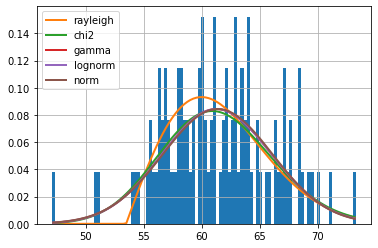

In [9]:
f = Fitter(fitaccuracy, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [10]:
accuracy_list = f.get_best(method = 'sumsquare_error')
accuracy_list


{'rayleigh': {'loc': 53.46421743761188, 'scale': 6.506613280990041}}

In [11]:
fitgir = np.array([gir])

,sumsquare_error,aic,bic,kl_div
norm,0.991301,543.663959,-452.180353,inf
lognorm,0.991801,545.907262,-447.524837,inf
gamma,0.991862,546.235757,-447.518615,inf
chi2,0.992806,548.067712,-447.423532,inf
rayleigh,1.002078,inf,-451.099131,inf


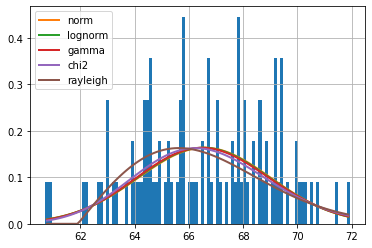

In [12]:
f = Fitter(fitgir, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [13]:
gir_list = f.get_best(method = 'sumsquare_error')
gir_list


{'norm': {'loc': 66.57350000000001, 'scale': 2.4367405996535614}}

In [14]:
fitbirdies = np.array([birdies])

,sumsquare_error,aic,bic,kl_div
lognorm,68.248116,122.547073,-24.386525,inf
gamma,68.276475,122.224942,-24.344981,inf
norm,68.380487,119.275421,-28.797927,inf
rayleigh,68.518205,inf,-28.596730,inf
exponpow,69.435081,100.183424,-22.662285,inf


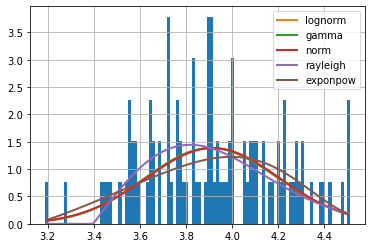

In [15]:
f = Fitter(fitbirdies, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [16]:
birdies_list = f.get_best(method = 'sumsquare_error')
birdies_list

{'lognorm': {'s': 0.021071276169458617,
  'loc': -9.747395651590328,
  'scale': 13.661062712682266}}

### Check previous years stats

In [17]:
historic_distance_df = pd.read_csv('data\historic_distance.csv')


In [18]:
#arrange as data frame
historic_distance_df_arr = historic_distance_df
historic_distance_df_arr.columns = ['1990', '2000', '2010','2020']
#https://note.nkmk.me/en/python-pandas-t-transpose/
historic_distance_df_arr

,1990,2000,2010,2020
0,279.6,301.4,315.5,322.1
1,279.4,298.0,309.8,322.0
2,278.0,288.7,308.5,315.3
3,277.6,288.7,307.3,314.0
4,277.6,288.5,307.2,313.8
...,...,...,...,...
95,263.1,273.3,287.9,297.4
96,263.0,273.2,287.8,297.3
97,263.0,273.2,287.7,297.3
98,263.0,273.2,287.6,297.3


In [19]:
distance_1990 = historic_distance_df_arr.iloc[:,0]
distance_2000 = historic_distance_df_arr.iloc[:,1]
distance_2010 = historic_distance_df_arr.iloc[:,2]
distance_2020 = historic_distance_df_arr.iloc[:,3]

In [20]:
mean_distance_1990 = statistics.mean(distance_1990)
mean_distance_2000 = statistics.mean(distance_2000)
mean_distance_2010 = statistics.mean(distance_2010)
mean_distance_2020 = statistics.mean(distance_2020)

In [21]:
mean_distance_1990

267.734

In [22]:
mean_distance_2000

278.643

In [23]:
mean_distance_2010

293.74

In [24]:
mean_distance_2020

303.459

In [25]:
distance_increase = ([mean_distance_2020 - mean_distance_2010],[mean_distance_2010 - mean_distance_2000], [mean_distance_2000 - mean_distance_1990] )

In [26]:
mean_distance_increase = np.mean(distance_increase)

In [27]:
std_distance_increase = np.std(distance_increase)

In [28]:
mean_distance_increase

11.90833333333334

In [29]:
std_distance_increase

2.3064722461417815

In [30]:
mean_distance_2030 = (mean_distance_2020 + mean_distance_increase)
mean_distance_2030

315.36733333333336

In [31]:
distance_list


{'lognorm': {'s': 0.11093697461805507,
  'loc': 226.62980940729665,
  'scale': 72.26386699032992}}

In [32]:
#distance = df_arr.iloc[:,2]

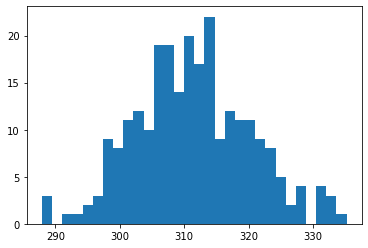

In [33]:
from scipy.stats import lognorm
s=0.11093697461805507
distance_2030 = lognorm.rvs(s, loc=237.9, scale=72.26386699032992, size=250) # loc is loc from distance_list + mean_distance_increase25
plt.hist(distance_2030, bins=30)

plt.show()

#'lognorm': {'s': 0.11093697461805507,
  #'loc': 226.62980940729665,
  #'scale': 72.26386699032992}}

### Accuracy

In [34]:
historic_accuracy_df = pd.read_csv('data\historic_accuracy.csv')

In [35]:
#arrange as data frame
historic_accuracy_df_arr = historic_accuracy_df
historic_accuracy_df_arr.columns = ['1990', '2000', '2010','2020']
#https://note.nkmk.me/en/python-pandas-t-transpose/
historic_accuracy_df_arr

,1990,2000,2010,2020
0,83.67,79.75,76.08,74.50
1,79.19,79.57,75.94,73.86
2,78.97,78.76,74.00,71.84
3,77.84,78.75,73.72,71.36
4,77.57,77.96,72.86,71.29
...,...,...,...,...
95,65.30,68.88,63.72,60.34
96,65.00,68.85,63.69,60.34
97,64.99,68.78,63.47,60.31
98,64.97,68.68,63.40,60.26


In [36]:
accuracy_1990 = historic_accuracy_df_arr.iloc[:,0]
accuracy_2000 = historic_accuracy_df_arr.iloc[:,1]
accuracy_2010 = historic_accuracy_df_arr.iloc[:,2]
accuracy_2020 = historic_accuracy_df_arr.iloc[:,3]

In [37]:
mean_accuracy_1990 = statistics.mean(accuracy_1990)
mean_accuracy_2000 = statistics.mean(accuracy_2000)
mean_accuracy_2010 = statistics.mean(accuracy_2010)
mean_accuracy_2020 = statistics.mean(accuracy_2020)

In [38]:
accuracy_increase = ([mean_accuracy_2020 - mean_accuracy_2010],[mean_accuracy_2010 - mean_accuracy_2000], [mean_accuracy_2000 - mean_accuracy_1990] )

In [39]:
mean_accuracy_increase = np.mean(accuracy_increase)
mean_accuracy_increase

-1.7376000000000005

In [40]:
std_accuracy_increase = np.std(accuracy_increase)

In [41]:
mean_accuracy_2030 = (mean_accuracy_2020 + mean_accuracy_increase)
mean_accuracy_2030

62.5958

In [42]:
from scipy.stats import rayleigh

# https://www.kite.com/python/answers/how-to-convert-a-dictionary-to-a-numpy-array-in-python 
# use this to put the scale factor in
#accuray_list_data = list(accuracy_list.items())
#accuray_list_array = np.array(accuray_list_data)
#accuray_list_array
accuracy_list

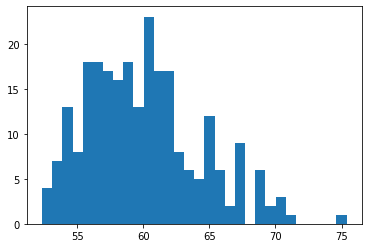

In [43]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html
accuracy_2030 = rayleigh.rvs(loc=51.7224, scale=6.506613280990041, size=250, random_state=None) # use the mean value determined for the loc and the scale is determined using fitter
plt.hist(accuracy_2030, bins=30)

plt.show()

### GIR

In [44]:
historic_gir_df = pd.read_csv('data\historic_gir.csv')

In [45]:
#arrange as data frame
historic_gir_df_arr = historic_gir_df
historic_gir_df_arr.columns = ['1990', '2000', '2010','2020']
#https://note.nkmk.me/en/python-pandas-t-transpose/
historic_gir_df_arr

,1990,2000,2010,2020
0,70.91,75.15,72.49,74.22
1,70.85,72.34,71.96,72.54
2,70.22,71.86,71.95,72.10
3,70.06,71.20,71.74,71.70
4,70.00,71.13,71.43,71.69
...,...,...,...,...
95,64.43,65.91,66.86,66.97
96,64.42,65.86,66.81,66.97
97,64.40,65.83,66.78,66.95
98,64.29,65.82,66.77,66.95


In [46]:
gir_1990 = historic_gir_df_arr.iloc[:,0]
gir_2000 = historic_gir_df_arr.iloc[:,1]
gir_2010 = historic_gir_df_arr.iloc[:,2]
gir_2020 = historic_gir_df_arr.iloc[:,3]

In [47]:
mean_gir_1990 = statistics.mean(gir_1990)
mean_gir_2000 = statistics.mean(gir_2000)
mean_gir_2010 = statistics.mean(gir_2010)
mean_gir_2020 = statistics.mean(gir_2020)

In [48]:
gir_increase = ([mean_gir_2020 - mean_gir_2010],[mean_gir_2010 - mean_gir_2000], [mean_gir_2000 - mean_gir_1990] )

In [49]:
mean_gir_increase = np.mean(gir_increase)
mean_gir_increase

0.854000000000004

In [50]:
std_gir_increase = np.std(gir_increase)

In [51]:
mean_gir_2030 = (mean_gir_2020 + mean_gir_increase)
mean_gir_2030

69.8079

In [52]:
from scipy.stats import norm

In [53]:
gir_list

{'norm': {'loc': 66.57350000000001, 'scale': 2.4367405996535614}}

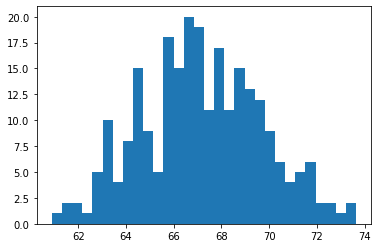

In [54]:
gir_2030 = norm.rvs(loc=67.154, scale=2.4367405996535614, size=250, random_state=None) # use the mean value determined for the loc and the scale is determined using fitter
plt.hist(gir_2030, bins=30)

plt.show()

### Birdies

In [55]:
historic_birdies_df = pd.read_csv('data\historic_birdies.csv')

In [56]:
#arrange as data frame
historic_birdies_df_arr = historic_birdies_df
historic_birdies_df_arr.columns = ['1990', '2000', '2010','2020']
#https://note.nkmk.me/en/python-pandas-t-transpose/
historic_birdies_df_arr

,1990,2000,2010,2020
0,3.88,4.92,4.06,4.67
1,3.84,4.26,4.03,4.55
2,3.82,4.22,4.02,4.55
3,3.76,4.21,4.01,4.42
4,3.76,4.08,4.00,4.38
...,...,...,...,...
187,2.61,2.88,2.95,3.20
188,2.59,2.80,2.88,3.20
189,2.58,2.77,2.82,3.18
190,2.29,2.76,2.80,3.04


In [57]:
birdies_1990 = historic_birdies_df_arr.iloc[:,0]
birdies_2000 = historic_birdies_df_arr.iloc[:,1]
birdies_2010 = historic_birdies_df_arr.iloc[:,2]
birdies_2020 = historic_birdies_df_arr.iloc[:,3]

In [58]:
mean_birdies_1990 = statistics.mean(birdies_1990)
mean_birdies_2000 = statistics.mean(birdies_2000)
mean_birdies_2010 = statistics.mean(birdies_2010)
mean_birdies_2020 = statistics.mean(birdies_2020)

In [59]:
birdies_1990

0      3.88
1      3.84
2      3.82
3      3.76
4      3.76
       ... 
187    2.61
188    2.59
189    2.58
190    2.29
191    2.05
Name: 1990, Length: 192, dtype: float64

In [60]:
birdies_increase = ([mean_birdies_2020 - mean_birdies_2010],[mean_birdies_2010 - mean_birdies_2000], [mean_birdies_2000 - mean_birdies_1990] )

In [61]:
mean_birdies_increase = np.mean(birdies_increase)
mean_birdies_increase 

0.20939236111111104

In [62]:
std_birdies_increase = np.std(birdies_increase)

In [63]:
mean_birdies_2030 = (mean_birdies_2020 + mean_birdies_increase)
mean_birdies_2030

3.9966840277777775

In [64]:
birdies_list

{'lognorm': {'s': 0.021071276169458617,
  'loc': -9.747395651590328,
  'scale': 13.661062712682266}}

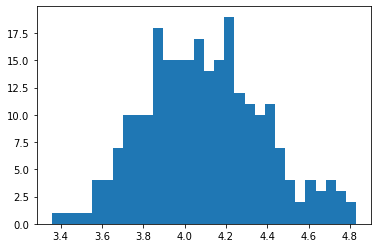

In [65]:
s=0.021071276169458617
birdies_2030 = lognorm.rvs(s, loc=-9.5384, scale=13.661062712682266, size=250) # use the mean value determined for the loc and the scale is determined using fitter
plt.hist(birdies_2030, bins=30)

plt.show()


In [66]:
df_distance_2030 = pd.DataFrame(distance_2030)
df_accuracy_2030 = pd.DataFrame(accuracy_2030)
df_gir_2030 = pd.DataFrame(gir_2030)
df_birdies_2030 = pd.DataFrame(birdies_2030)

In [67]:
total_2030 = pd.concat([df_distance_2030, df_accuracy_2030, df_gir_2030, df_birdies_2030], axis=1) #https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [68]:
total_2030.columns = ['Driving distance (yds)', 'Driving accuracy (%)', 'GIR (%)', 'Birdie average (%)']
print(total_2030)

     Driving distance (yds)  Driving accuracy (%)    GIR (%)  \
0                310.191915             57.161499  64.336927   
1                312.295874             57.612008  65.920606   
2                311.969727             54.297404  65.925531   
3                298.164303             67.178822  71.444069   
4                313.476108             59.374141  62.698334   
..                      ...                   ...        ...   
245              309.621805             64.665328  68.090027   
246              317.283497             56.970910  66.763567   
247              322.184791             69.359469  69.213068   
248              297.757004             60.083132  70.602276   
249              294.193671             67.493107  68.777313   

     Birdie average (%)  
0              3.730813  
1              4.412147  
2              4.110341  
3              4.359514  
4              4.210439  
..                  ...  
245            3.953334  
246            4.389665

In [69]:
total_2030_t = total_2030.T
print(total_2030_t)
#https://note.nkmk.me/en/python-pandas-t-transpose/

                               0           1           2           3    \
Driving distance (yds)  310.191915  312.295874  311.969727  298.164303   
Driving accuracy (%)     57.161499   57.612008   54.297404   67.178822   
GIR (%)                  64.336927   65.920606   65.925531   71.444069   
Birdie average (%)        3.730813    4.412147    4.110341    4.359514   

                               4           5           6           7    \
Driving distance (yds)  313.476108  314.566861  316.766786  299.372581   
Driving accuracy (%)     59.374141   53.368582   64.308123   57.787653   
GIR (%)                  62.698334   64.277058   68.484598   63.649604   
Birdie average (%)        4.210439    4.107683    4.130046    4.107277   

                               8           9    ...         240         241  \
Driving distance (yds)  301.019482  309.038477  ...  313.167295  308.531894   
Driving accuracy (%)     56.478211   55.784085  ...   60.099857   68.875321   
GIR (%)              

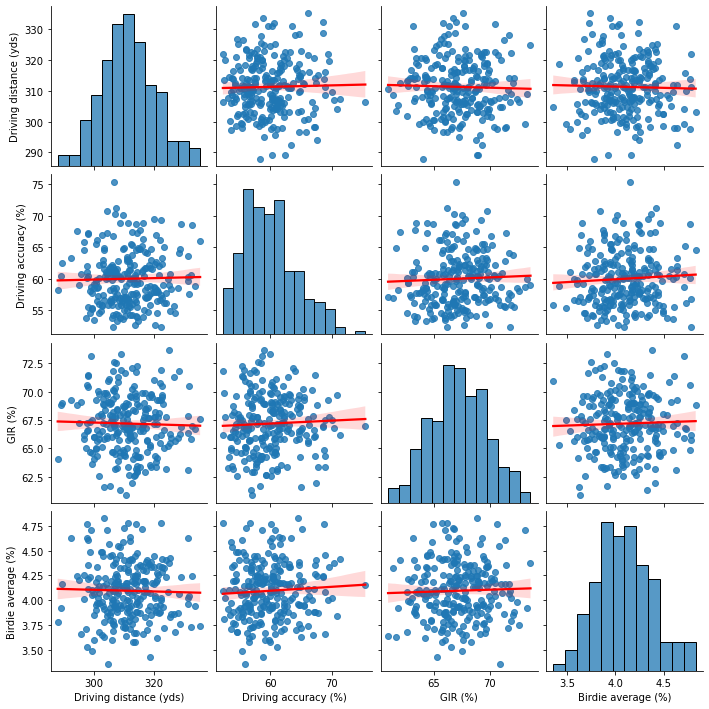

In [70]:
sns.pairplot(total_2030, kind="reg", plot_kws={'line_kws':{'color':'red'}})
# https://stackoverflow.com/questions/50722972/change-the-regression-line-colour-of-seaborns-pairplot